In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Relation.csv

In [2]:
relation_df = pd.read_csv('../../data/Train/Relation/Relation.csv').drop(columns=['Unnamed: 0'])
relation_df.head()

,userid,like_id
0,c6a9a43058c8cc8398ca6e97324c0fae,8628204013
1,c6a9a43058c8cc8398ca6e97324c0fae,19040608370
2,c6a9a43058c8cc8398ca6e97324c0fae,24054583527
3,c6a9a43058c8cc8398ca6e97324c0fae,26726417043
4,c6a9a43058c8cc8398ca6e97324c0fae,31796936730


The table above includes an entry for each time a user liked a page. Let's take a look at how many times each page was liked:

In [3]:
page_id_like_counts = relation_df['like_id'].value_counts()

In [4]:
print("Total unique pages: {}".format(len(page_id_like_counts)))
print("Pages with <= 50 likes: {}".format(len(page_id_like_counts[page_id_like_counts <= 50])))
print("Pages with > 50 likes: {}".format(len(page_id_like_counts[page_id_like_counts > 50])))

Total unique pages: 536204
Pages with <= 50 likes: 531612
Pages with > 50 likes: 4592


Since most pages have less than 50 likes, the density function is extremely skewed towards the left:

(-5, 2000)

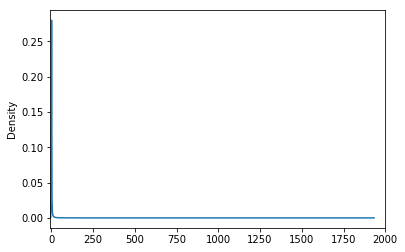

In [5]:
page_id_like_counts.plot.kde().set_xlim(-5, 2000)

If we zoom in to ones that have up to 50 likes:

(0, 50)

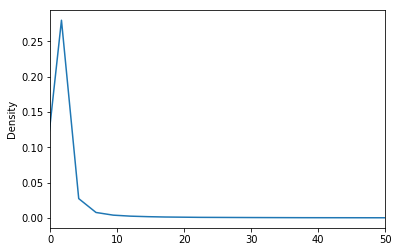

In [6]:
page_id_like_counts.plot.kde().set_xlim(0,50)

Then we see that a majority (99%+) have less than 10 likes

# Comparison to Profile.csv

In [7]:
profile_df = pd.read_csv('../../data/Train/Profile/Profile.csv').drop(columns=['Unnamed: 0'])

In [20]:
page_id_like_counts.head()

112936425387489    1289
24609282673        1136
7608631709         1061
7270241753         1033
10376464573         911
Name: like_id, dtype: int64

The most liked page has 1289 likes. Let's look at a violin plot of the five personality characteristics of the people that liked that page:

In [ ]:
# WIP profile_df[profile_df['userid'] == ]

In [ ]:
# WIP sns.violinplot(
#     data=df[df['gender'] == 0.0].iloc[:, 3:]
# ).set_title('Violin plot of people that liked page id 112936425387489')